### Treść zadania

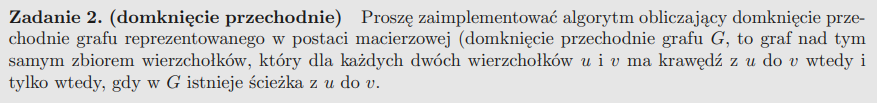

# Algorytm #1
#### (Z wykorzystaniem algorytmu Floyda-Warshalla)

### Omówienie algorytmu

Omówienie tutaj: https://www.geeksforgeeks.org/transitive-closure-of-a-graph/

### Złożoność

###### Obliczeniowa:
$ O(V^3) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
def transitive_closure(G: 'graph represented by adjacency matrix'):
    n = len(G)
    H = [[False] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if G[i][j]:
                H[i][j] = True
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if not H[i][j]:
                    H[i][j] = H[i][k] and H[k][j]
                    
    return H

###### Kilka testów

##### Pomocnicze:

In [2]:
def directed_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[False] * n for _ in range(n)]  # False means no edge
    for e in E:
        G[e[0]][e[1]] = True
    return G

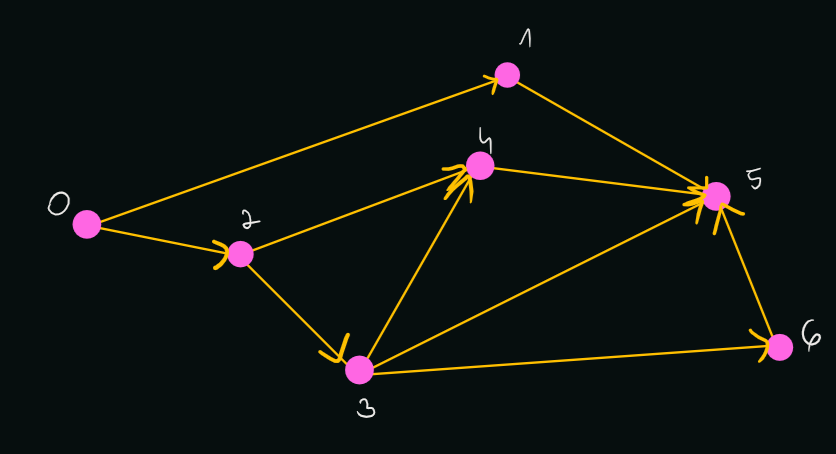

In [3]:
E = [(0, 1), (1, 5), (0, 2), (2, 4), (2, 3), (3, 4), (4, 5), (3, 5), (3, 6), (6, 5)]

G = directed_graph_matrix(E)
print(*(list(map(int, row)) for row in transitive_closure(G)), sep='\n')

[0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0]


# Algorytm #2
#### (Z wykorzystaniem algorytmu DFS/BFS z każdego wierzchołka)

Opis tutaj: https://www.techiedelight.com/transitive-closure-graph/

Algorytm bardzo prosty, ponieważ polega na przejściu grafu algorytmem DFS/BFS, starując z każdego wierzchołka od nowa (tj. resetujemy tablicę odwiedzonych wierzchołków - najlepiej zwiększyć licznik epok o 1 i traktować wszystkie mniejsze wartości od obecnej jako wierzchołki nieodwiedzone). Ten algorytm ma złożoność lepszą dla rzadkich grafów w reprezentacji listowej (a dla gęstych w reprezentacji listowej nieco gorszą $ E = O(V^2) \rightarrow O(V \cdot (V + E)) = O(V \cdot (V + V^2)) \lt O(V \cdot V^2) = O(V^3) $. Dla grafów w reprezentacji macierzowej złożoność jest taka sama, więc bez sensu jest wykorzystywanie tego algorytmu, ponieważ mechanizm rekurencji i sprawdzania nieodwiedzonych wierzchołków działa wolniej niż zwykłe 3 pętle w powyższej implementacji (chyba, że byśmy przerobili graf na postać listową, ale musi być on rzadki, a w reprezentacji macierzowej zazwyczaj są grafy gęste, więc nie opłaca nam się to).

## Dla reprezentacji macierzowej grafu

### Złożoność

###### Obliczeniowa:
$ O(V^3) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [4]:
def transitive_closure(G: 'graph represented by adjacency matrix'):
    n = len(G)
    H = [[False] * n for _ in range(n)]
    visited = [0] * n
    era = 1
    
    def dfs(u):
        visited[u] = era
        for v in range(n):
            if G[u][v] and visited[v] != era:
                # We use s vertex from the outer (nonlocal) scope (see a loop below)
                H[s][v] = True
                dfs(v)
                
    for s in range(n):
        dfs(s)
        era += 1
        
    return H

###### Kilka testów

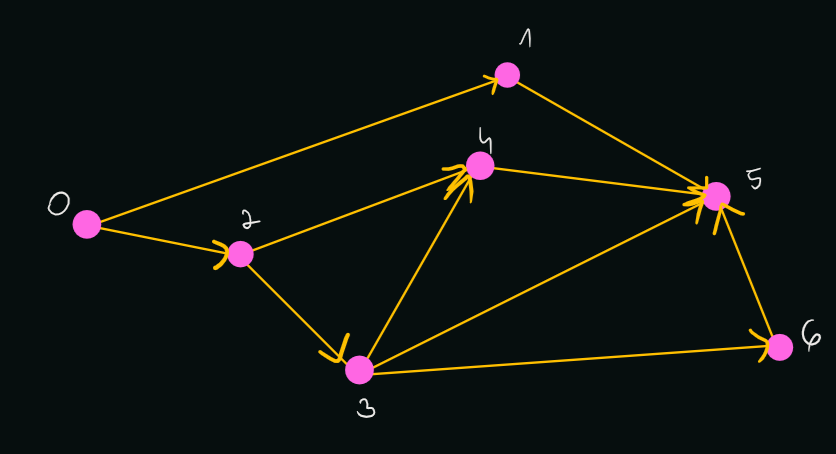

In [5]:
E = [(0, 1), (1, 5), (0, 2), (2, 4), (2, 3), (3, 4), (4, 5), (3, 5), (3, 6), (6, 5)]

G = directed_graph_matrix(E)
print(*(list(map(int, row)) for row in transitive_closure(G)), sep='\n')

[0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0]


## Dla reprezentacji listowej grafu

### Złożoność

###### Obliczeniowa:
$ O(V \cdot (V + E)) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [6]:
def transitive_closure(G: 'graph represented by adjacency lists'):
    n = len(G)
    H = [[False] * n for _ in range(n)]
    visited = [0] * n
    era = 1
    
    def dfs(u):
        visited[u] = era
        for v in G[u]:
            if visited[v] != era:
                # We use s vertex from the outer (nonlocal) scope (see a loop below)
                H[s][v] = True
                dfs(v)
                
    for s in range(n):
        dfs(s)
        era += 1
        
    return H

###### Kilka testów

##### Pomocnicze:

In [7]:
def directed_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append(e[1])
    return G

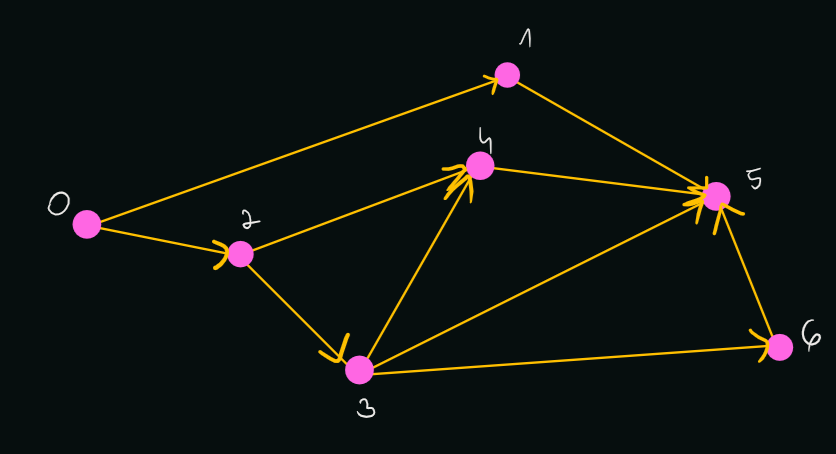

In [8]:
E = [(0, 1), (1, 5), (0, 2), (2, 4), (2, 3), (3, 4), (4, 5), (3, 5), (3, 6), (6, 5)]

G = directed_graph_list(E)
print(*(list(map(int, row)) for row in transitive_closure(G)), sep='\n')

[0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0]
